In [106]:
#Esto se hace para que el notebook pueda acceder a rutas por encima de el
import os 
import sys 

rooth_path = os.path.abspath("..")
sys.path.append(rooth_path)

In [107]:
import pandas as pd
from src.config import ubicacion_datos_crudos_extraidos
df = pd.read_csv(f"../{ubicacion_datos_crudos_extraidos}")

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202267 entries, 0 to 1202266
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Action                 1202267 non-null  object 
 1   org:resource           1202267 non-null  object 
 2   concept:name           1202267 non-null  object 
 3   EventOrigin            1202267 non-null  object 
 4   EventID                1202267 non-null  object 
 5   lifecycle:transition   1202267 non-null  object 
 6   time:timestamp         1202267 non-null  object 
 7   case:LoanGoal          1202267 non-null  object 
 8   case:ApplicationType   1202267 non-null  object 
 9   case:concept:name      1202267 non-null  object 
 10  case:RequestedAmount   1202267 non-null  float64
 11  FirstWithdrawalAmount  42995 non-null    float64
 12  NumberOfTerms          42995 non-null    float64
 13  Accepted               42995 non-null    object 
 14  MonthlyCost       

In [109]:
df.head()

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df = df.drop("org:resource", axis=1)          # No nos interesa quién ejecutó la actividad
df = df.drop("Action", axis=1)                # Acción técnica del evento
df = df.drop("EventOrigin", axis=1)           # Origen técnico (Application / Workflow)
df = df.drop("EventID", axis=1)                # ID técnico del evento
df = df.drop("lifecycle:transition", axis=1)  # Ciclo del evento (filtraremos COMPLETE)
df = df.drop("OfferID", axis=1)                # ID técnico de la oferta


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202267 entries, 0 to 1202266
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   concept:name           1202267 non-null  object 
 1   time:timestamp         1202267 non-null  object 
 2   case:LoanGoal          1202267 non-null  object 
 3   case:ApplicationType   1202267 non-null  object 
 4   case:concept:name      1202267 non-null  object 
 5   case:RequestedAmount   1202267 non-null  float64
 6   FirstWithdrawalAmount  42995 non-null    float64
 7   NumberOfTerms          42995 non-null    float64
 8   Accepted               42995 non-null    object 
 9   MonthlyCost            42995 non-null    float64
 10  Selected               42995 non-null    object 
 11  CreditScore            42995 non-null    float64
 12  OfferedAmount          42995 non-null    float64
dtypes: float64(6), object(7)
memory usage: 119.2+ MB


In [113]:
#Renombramos las columnas de nuestro dataframe para que se entiendan mejor
df = df.rename(columns={
    "concept:name": "Actividad",
    "time:timestamp": "Fecha_hora_actividad",
    "case:concept:name": "ID_solicitud",
    "case:LoanGoal": "Objetivo_credito",
    "case:ApplicationType": "Tipo_solicitud",
    "case:RequestedAmount": "Monto_solicitado",
    "FirstWithdrawalAmount": "Primer_desembolso",
    "NumberOfTerms": "Numero_cuotas",
    "Accepted": "Solicitud_aceptada",
    "MonthlyCost": "Costo_mensual",
    "Selected": "Oferta_seleccionada",
    "CreditScore": "Puntaje_crediticio",
    "OfferedAmount": "Monto_ofertado"
})


In [114]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202267 entries, 0 to 1202266
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Actividad             1202267 non-null  object 
 1   Fecha_hora_actividad  1202267 non-null  object 
 2   Objetivo_credito      1202267 non-null  object 
 3   Tipo_solicitud        1202267 non-null  object 
 4   ID_solicitud          1202267 non-null  object 
 5   Monto_solicitado      1202267 non-null  float64
 6   Primer_desembolso     42995 non-null    float64
 7   Numero_cuotas         42995 non-null    float64
 8   Solicitud_aceptada    42995 non-null    object 
 9   Costo_mensual         42995 non-null    float64
 10  Oferta_seleccionada   42995 non-null    object 
 11  Puntaje_crediticio    42995 non-null    float64
 12  Monto_ofertado        42995 non-null    float64
dtypes: float64(6), object(7)
memory usage: 119.2+ MB


,Actividad,Fecha_hora_actividad,Objetivo_credito,Tipo_solicitud,ID_solicitud,Monto_solicitado,Primer_desembolso,Numero_cuotas,Solicitud_aceptada,Costo_mensual,Oferta_seleccionada,Puntaje_crediticio,Monto_ofertado
0,A_Create Application,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A_Submitted,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W_Handle leads,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W_Handle leads,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W_Complete application,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
keys = df["Actividad"].unique() #Miramos cuales son todas las posibles actividades por las que puede pasar una solicitud de credito
print(keys)

['A_Create Application' 'A_Submitted' 'W_Handle leads'
 'W_Complete application' 'A_Concept' 'A_Accepted' 'O_Create Offer'
 'O_Created' 'O_Sent (mail and online)' 'W_Call after offers' 'A_Complete'
 'W_Validate application' 'A_Validating' 'O_Returned'
 'W_Call incomplete files' 'A_Incomplete' 'O_Accepted' 'A_Pending'
 'A_Denied' 'O_Refused' 'O_Cancelled' 'A_Cancelled' 'O_Sent (online only)'
 'W_Assess potential fraud' 'W_Personal Loan collection'
 'W_Shortened completion ']


In [ ]:
#Esos posibles valores que puede tomar la actividad los mapearemos hacia estos nuevos valores, en un diccionario [key:value]
values = [
    "Banco crea una nueva solicitud de crédito",
    "Cliente envía la solicitud de crédito",
    "Banco realiza gestión inicial del lead del cliente",
    "Banco solicita completar información faltante de la solicitud",
    "Banco registra el concepto o propósito del crédito",
    "Cliente acepta continuar con la solicitud de crédito",
    "Banco crea una oferta de crédito",
    "Banco genera formalmente una oferta de crédito",
    "Banco envía la oferta al cliente por correo o canal digital",
    "Banco realiza seguimiento telefónico después de enviar la oferta",
    "Banco marca la solicitud como completada",
    "Banco valida y revisa la información de la solicitud",
    "Banco valida administrativamente la solicitud",
    "Cliente devuelve la oferta para revisión o ajustes",
    "Banco llama al cliente por documentación incompleta",
    "Banco completa información pendiente de la solicitud",
    "Cliente acepta la oferta de crédito",
    "Banco deja la solicitud en estado pendiente",
    "Banco rechaza la solicitud de crédito",
    "Cliente rechaza la oferta de crédito",
    "Banco cancela la solicitud de crédito",
    "Cliente cancela voluntariamente la solicitud",
    "Banco envía la oferta solo por canal digital",
    "Banco evalúa la solicitud por posible fraude",
    "Banco gestiona el cobro de un préstamo personal",
    "Banco utiliza un proceso abreviado de finalización"
]


In [118]:
def mapeado():
    diccionario_mapeado = dict(zip(keys,values)) #Creamos el diccionario donde el value es la actividad que no se entiende a que hace referencia y la key es su correspondiente valor que si se entiende a que hace referencia
    df["Actividad"] = df["Actividad"].map(diccionario_mapeado).astype(object) #.map nos pide un diccionario, diccionario que se hizo arriba llamado diccionario_mapeado

mapeado()

In [119]:
df.head(30)

,Actividad,Fecha_hora_actividad,Objetivo_credito,Tipo_solicitud,ID_solicitud,Monto_solicitado,Primer_desembolso,Numero_cuotas,Solicitud_aceptada,Costo_mensual,Oferta_seleccionada,Puntaje_crediticio,Monto_ofertado
0,Banco crea una nueva solicitud de crédito,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cliente envía la solicitud de crédito,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Banco realiza gestión inicial del lead del cli...,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Banco realiza gestión inicial del lead del cli...,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Banco solicita completar información faltante ...,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Banco registra el concepto o propósito del cré...,2016-01-01 09:52:36.413000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Banco solicita completar información faltante ...,2016-01-02 10:45:22.429000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Banco solicita completar información faltante ...,2016-01-02 10:49:28.816000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Cliente acepta continuar con la solicitud de c...,2016-01-02 11:23:04.299000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Banco crea una oferta de crédito,2016-01-02 11:29:03.994000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,20000.0,44.0,True,498.29,True,979.0,20000.0


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

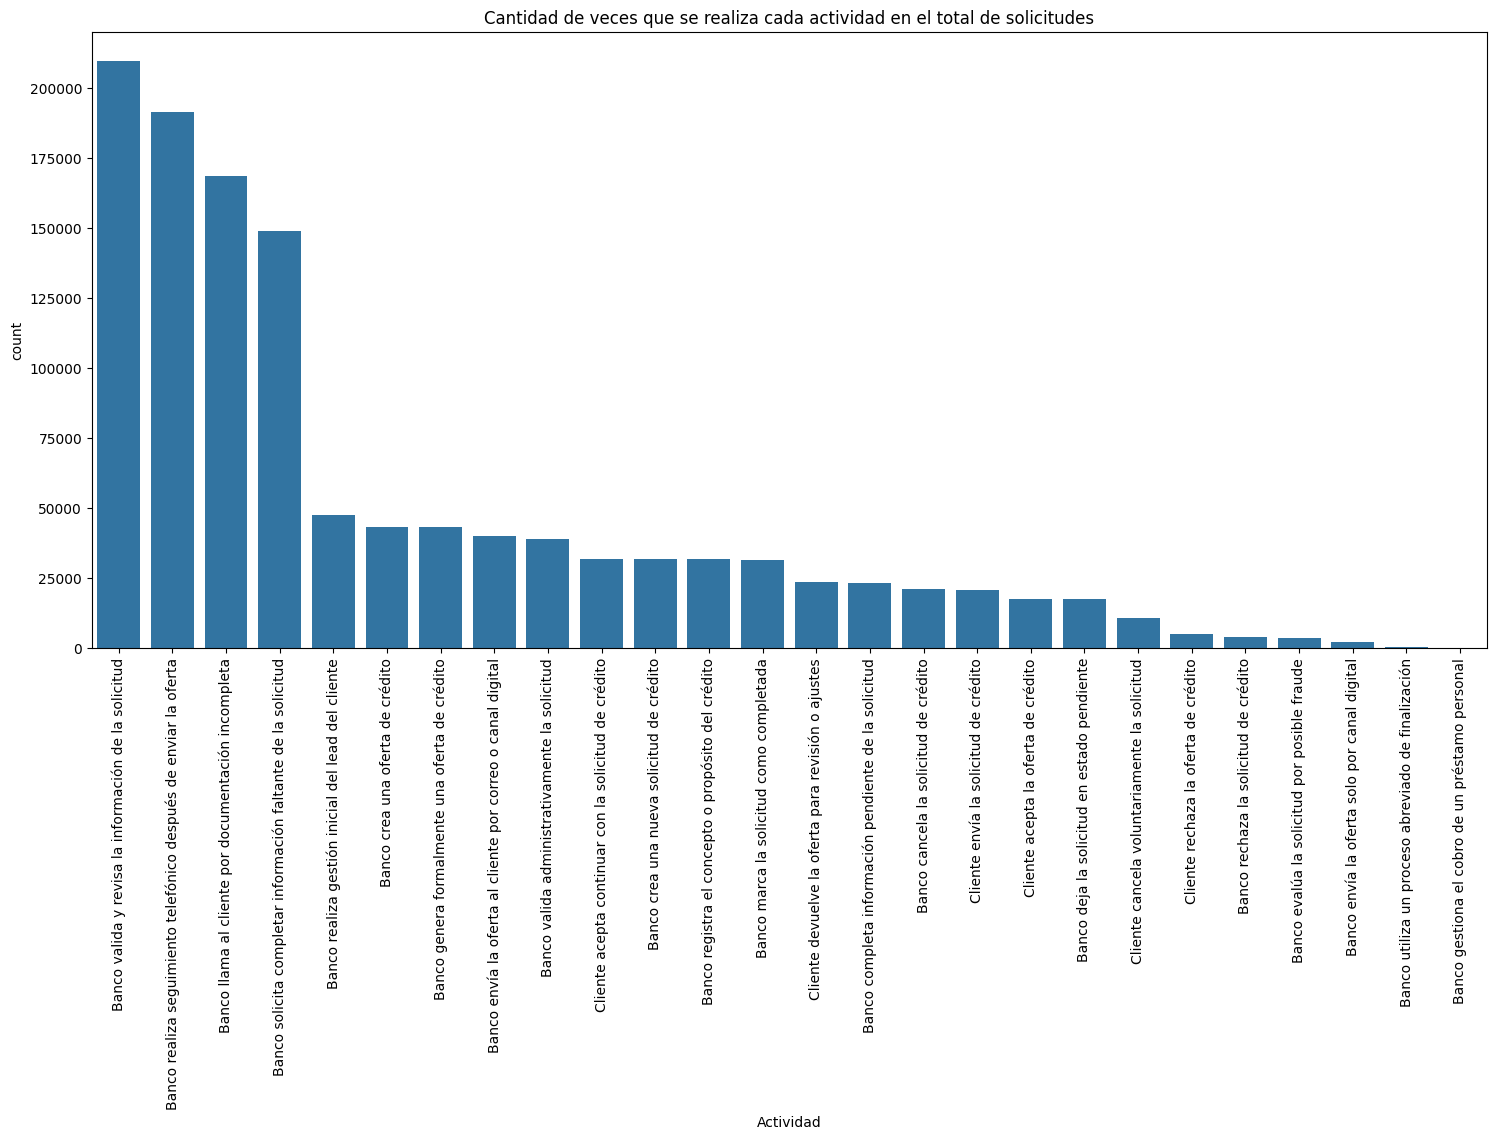

In [121]:
plt.figure(figsize=(18,8))
sns.countplot(data=df, x="Actividad",order=df["Actividad"].value_counts().index)
plt.title("Cantidad de veces que se realiza cada actividad en el total de solicitudes")
plt.xticks(rotation=90) #Me rota el nombre de cada barra 90 grados
plt.show()

In [123]:
solicitudes = list(df.groupby("ID_solicitud")["Actividad"]) #Ahora creamos una lista que almacene el proceso que sigue cada una de las solicitudes

In [126]:

print((solicitudes[0][1])) #Miremos todo el proceso que siguió la primera solicitud

686058            Banco crea una nueva solicitud de crédito
686059                Cliente envía la solicitud de crédito
686060    Banco realiza gestión inicial del lead del cli...
686061    Banco realiza gestión inicial del lead del cli...
686062    Banco solicita completar información faltante ...
686063    Banco registra el concepto o propósito del cré...
686064    Banco solicita completar información faltante ...
686065    Banco solicita completar información faltante ...
686066    Cliente acepta continuar con la solicitud de c...
686067                     Banco crea una oferta de crédito
686068       Banco genera formalmente una oferta de crédito
686069    Banco envía la oferta al cliente por correo o ...
686070    Banco solicita completar información faltante ...
686071    Banco realiza seguimiento telefónico después d...
686072    Banco realiza seguimiento telefónico después d...
686073             Banco marca la solicitud como completada
686074    Banco realiza seguimiento tele

In [ ]:
#Ahora necesitamos hacer una lista de tuplas, ya que esto es lo que recibe efficient-apriori
solicitudes_tuplas = [
    (n,*s) for n,s in solicitudes # *s sirve para desempaquetar s que es una serie
]

In [131]:
print(solicitudes_tuplas[0][1]) #Miremos el segundo componente de la primera tupla 

Banco crea una nueva solicitud de crédito


In [133]:
#importamos el modelo
from efficient_apriori import apriori
#Aplicamos el modelo
conjuntos, reglas = apriori(solicitudes_tuplas,min_support=0.5,min_confidence=0.5)
#Ahora filtramos para que solo me muestre las reglas con un consecuente de cardinalidad 1, osea, las consecuencias que solo contengan 1 elemento o actividad
reglas = filter(lambda regla:len(regla.rhs) == 1 and regla.rhs[0] == "Banco rechaza la solicitud de crédito", reglas)
#Imprimimos las reglas que cumplan con el filtro de arriba
for regla in reglas:
  print(regla)  